Importação das bibliotecas utilizadas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix

from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE

## Limpeza e Tratamento dos Dados

Carregamento e visualização dos dados:

In [3]:
df = pd.read_json("Telco-Customer-Churn.json", orient='records')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


Normalização dos quatro subtipos de informações em _dataframes_:

In [4]:
df_customer = pd.json_normalize(df.customer)
df_phone = pd.json_normalize(df.phone)
df_internet = pd.json_normalize(df.internet)
df_account = pd.json_normalize(df.account)

Concatenação dos _dataframes_ e renomeação das colunas:

In [5]:
df.drop(['customerID', 'customer', 'phone', 'internet', 'account'], axis=1, inplace=True)
df_complete = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis=1)
df_complete.rename(columns={"gender": "Gender", "tenure": "Tenure", "Charges.Monthly": "ChargesMonthly", "Charges.Total": "ChargesTotal"}, inplace=True)
df_complete

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Verifacação dos tipos das colunas:

In [6]:
df_complete.dtypes

Churn                object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
ChargesMonthly      float64
ChargesTotal         object
dtype: object

Verificação dos valores únicos em cada coluna:

In [7]:
for col in df_complete:
    print(df_complete[col].unique())

['No' 'Yes' '']
['Female' 'Male']
[0 1]
['Yes' 'No']
['Yes' 'No']
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['One year' 'Month-to-month' 'Two year']
['Yes' 'No']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


A coluna _Churn_ apresenta valores do tipo '', o que representa uma informação sem valor para o _dataframe_.

In [8]:
df_complete[df_complete.Churn == '']

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
30,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


Contabilização dos valores presentes da coluna _Churn_:

In [9]:
df_complete.Churn.value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

Portanto, exclui-se as linhas que possuem tal valor:

In [10]:
df_complete = df_complete[df_complete.Churn != '']

Verificando melhor os dados, percebe-se que, para o caso onde _Tenure_ é 0, o valor de _ChargesTotal_ é ' ', pois ainda não há valor total contabilizado para o usuário, nesse caso há duas possibilidades: excluir as linhas da tabela onde ocorrem esses casos ou substituir esses valores vazios por outros valores.

In [11]:
df_complete[df_complete.ChargesTotal == ' ']

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
975,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


Como solução, é adotada a substituição desses casos pelo valor 0, já que em teoria, esses usuários assinaram o serviço por 0 meses, portanto, não há um valor total de gastos ainda:

In [12]:
df_complete.loc[df_complete.ChargesTotal == ' ', 'ChargesTotal'] = 0

Transforma-se a coluna _SeniorCitizen_ para um tipo categórico:

In [13]:
df_complete.SeniorCitizen.replace([0, 1], ['No', 'Yes'], inplace=True)

C:\Users\nicho\AppData\Local\Temp\ipykernel_12172\3992121032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete.SeniorCitizen.replace([0, 1], ['No', 'Yes'], inplace=True)


Define-se o tipo de cada coluna:

In [14]:
df_complete.astype(
    {'Churn':'string',
    'Gender':'string',
    'SeniorCitizen': 'string',
    'Partner':'string',
    'Dependents':'string',
    'PhoneService':'string',
    'MultipleLines':'string',
    'InternetService':'string',
    'InternetService':'string',
    'OnlineSecurity':'string',
    'InternetService':'string',
    'OnlineBackup':'string',
    'DeviceProtection':'string',
    'TechSupport':'string',
    'StreamingTV':'string',
    'StreamingMovies':'string',
    'Contract':'string',
    'PaperlessBilling':'string',
    'PaymentMethod':'string',
    'ChargesTotal':'float64',}
    ).dtypes

Churn                string
Gender               string
SeniorCitizen        string
Partner              string
Dependents           string
Tenure                int64
PhoneService         string
MultipleLines        string
InternetService      string
OnlineSecurity       string
OnlineBackup         string
DeviceProtection     string
TechSupport          string
StreamingTV          string
StreamingMovies      string
Contract             string
PaperlessBilling     string
PaymentMethod        string
ChargesMonthly      float64
ChargesTotal        float64
dtype: object

Verificação se existem valores _null_ ou _not a number_:

In [15]:
df_complete.isnull().values.any()

False

In [16]:
df_complete.isna().values.any()

False

Resultado final:

In [17]:
df_complete

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,No,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Yes,Male,No,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,Male,No,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,No,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Por último, salva-se o _dataframe_ em um arquivo .csv:

In [18]:
df_complete.to_csv("dados_lt.csv", index=False)

## Informações Sobre os Dados

Carregamento dos dados após limpeza e tratamento:

In [21]:
dados = pd.read_csv("dados_lt.csv")

Visualização dos dados:

In [22]:
dados

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,No,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,Yes,Male,No,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,No,Male,No,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,No,Male,No,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Gráfico que mostra a contagem e porcentagem dos clientes que cancelaram e não cancelaram o plano:

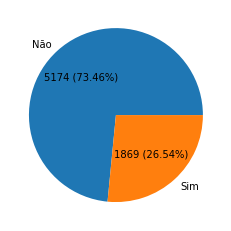

In [23]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.2f}%)'.format(v=val, p=pct)
    return my_autopct

plt.pie(dados.Churn.value_counts(), labels=['Não', 'Sim'], autopct=make_autopct(dados.Churn.value_counts()));

Como pode-se ver mais de um quarto dos dados mostra que houve clientes que cancelaram o plano.

A seguir, é mostrado os gráficos de cada atributo do _dataset_ relacionados com a evasão dos clientes:

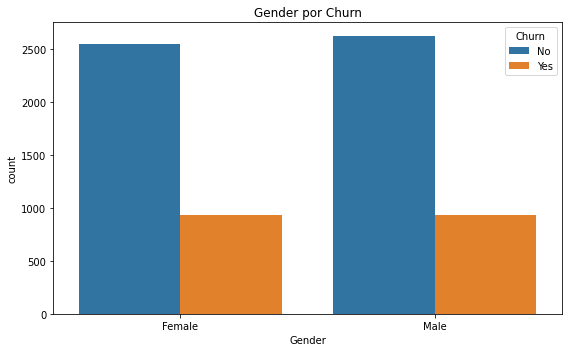

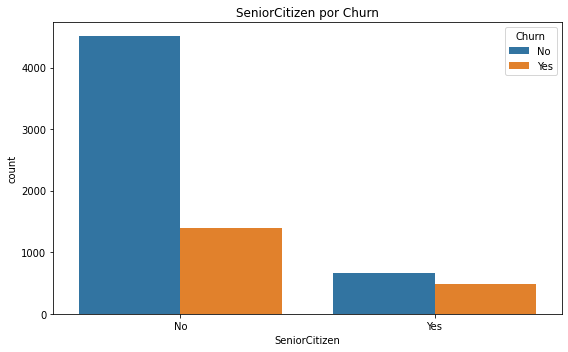

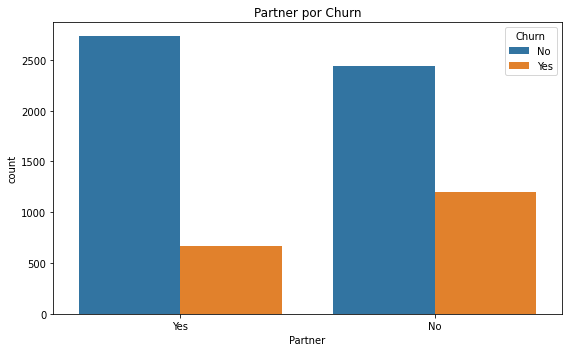

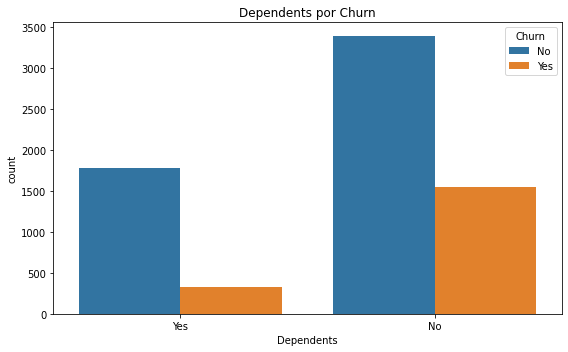

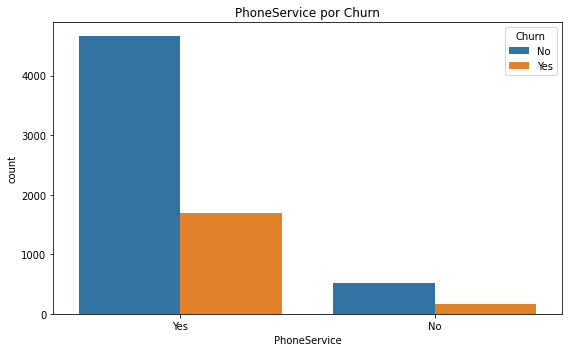

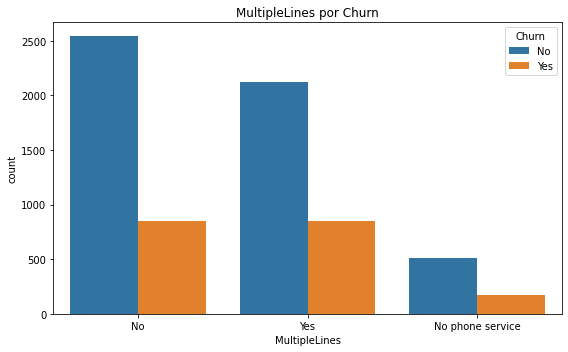

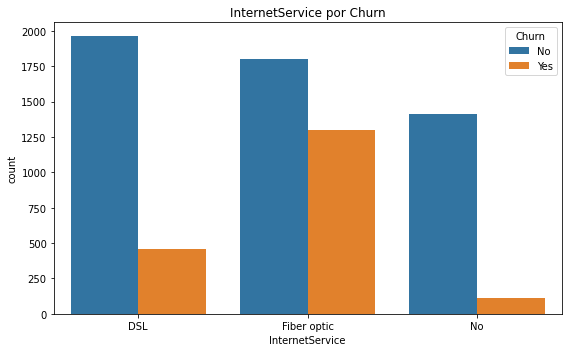

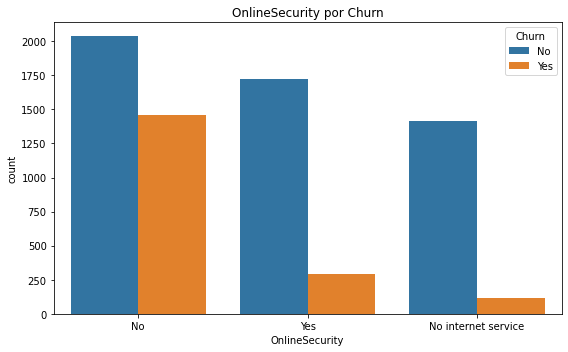

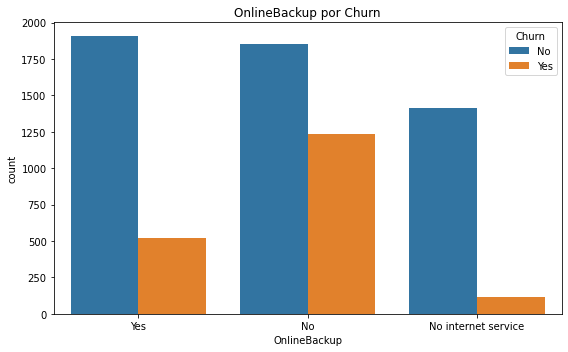

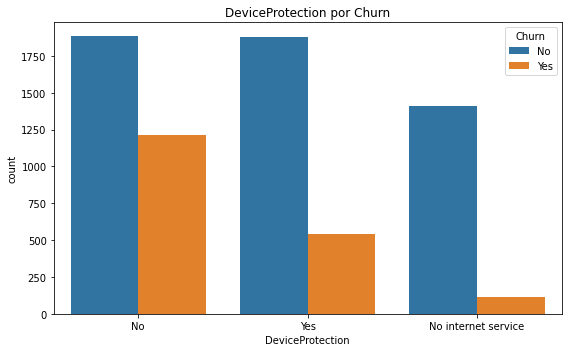

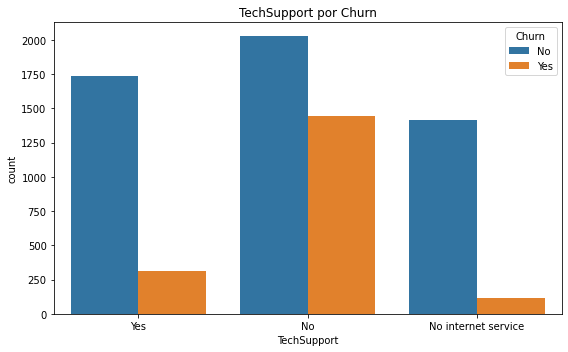

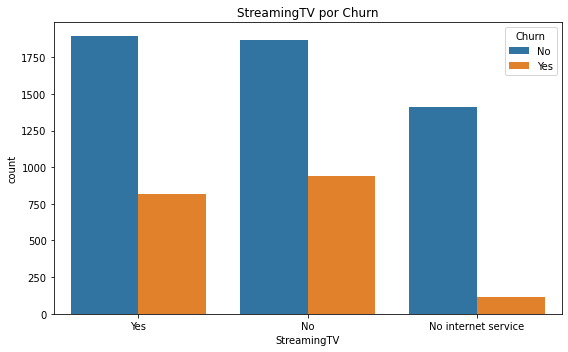

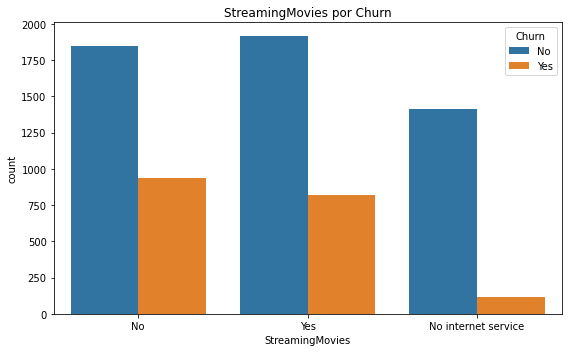

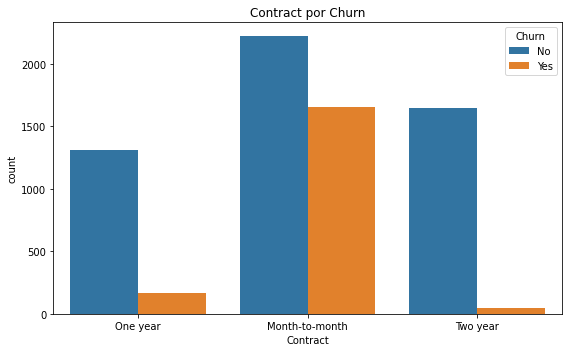

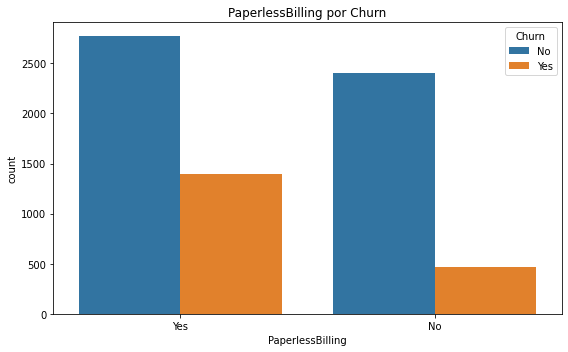

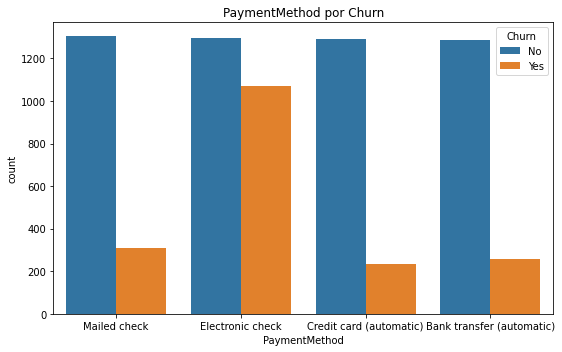

In [26]:
for col in ['Gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=dados);
    plt.title("{} por Churn".format(col))
    plt.tight_layout()
    plt.show()

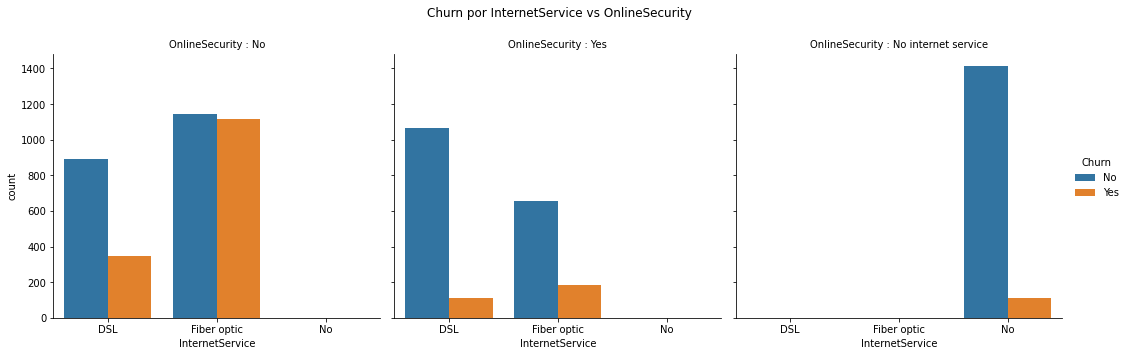

In [75]:
plot = sns.catplot(data=dados, kind='count', x='InternetService', hue='Churn', col='OnlineSecurity');
plot.set_titles('{col_var} : {col_name}');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn por InternetService vs OnlineSecurity');

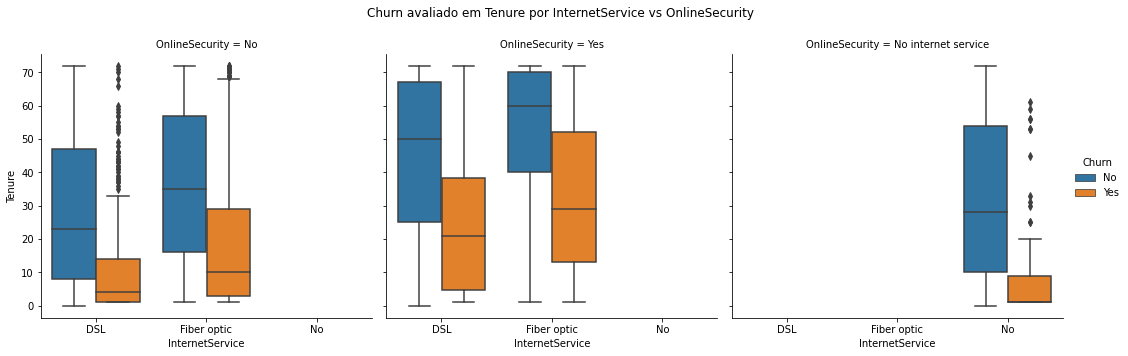

In [67]:
plot = sns.catplot(data=dados, kind='box', x='InternetService', y='Tenure', hue='Churn', col='OnlineSecurity');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn avaliado em Tenure por InternetService vs OnlineSecurity');

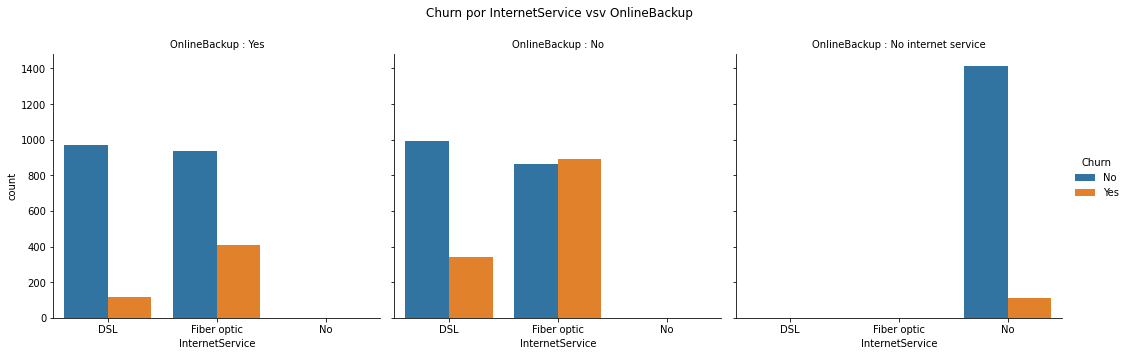

In [60]:
plot = sns.catplot(data=dados, kind='count', x='InternetService', hue='Churn', col='OnlineBackup');
plot.set_titles('{col_var} : {col_name}');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn por InternetService vsv OnlineBackup');

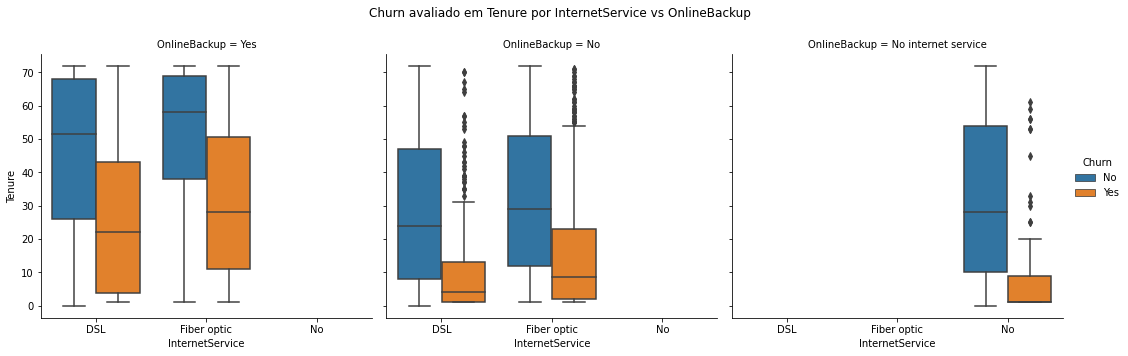

In [73]:
plot = sns.catplot(data=dados, kind='box', x='InternetService', y='Tenure', hue='Churn', col='OnlineBackup');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn avaliado em Tenure por InternetService vs OnlineBackup');

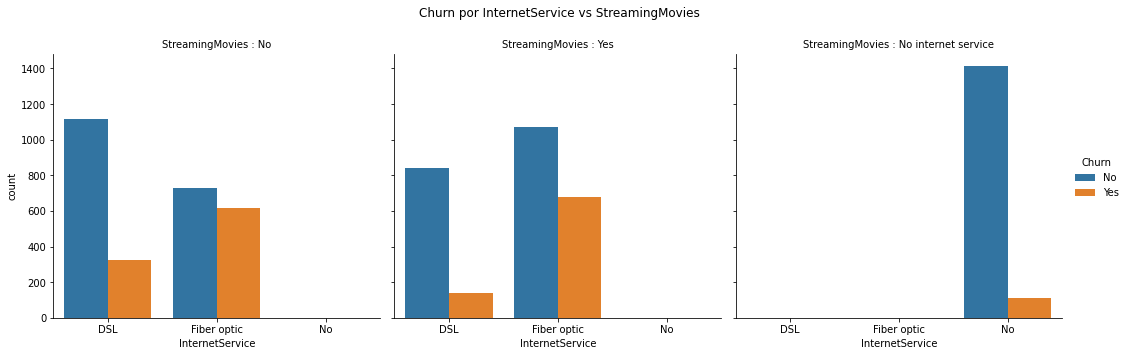

In [64]:
plot = sns.catplot(data=dados, kind='count', x='InternetService', hue='Churn', col='StreamingMovies');
plot.set_titles('{col_var} : {col_name}');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn por InternetService vs StreamingMovies');

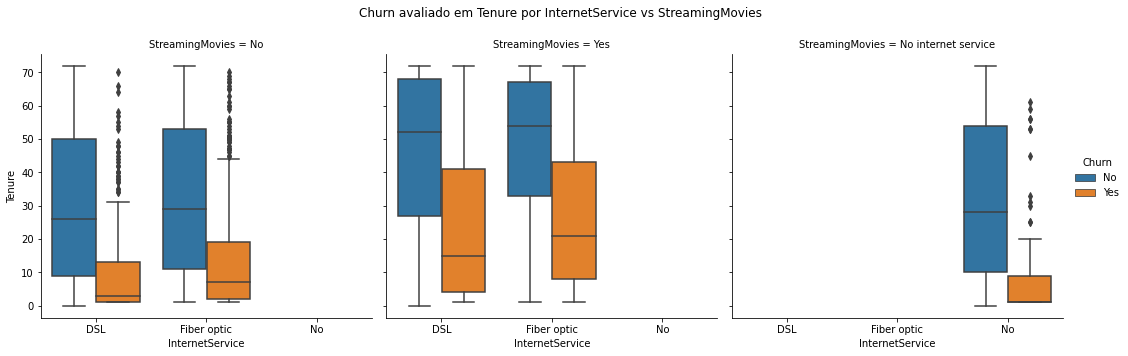

In [72]:
plot = sns.catplot(data=dados, kind='box', x='InternetService', y='Tenure', hue='Churn', col='StreamingMovies');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn avaliado em Tenure por InternetService vs StreamingMovies');

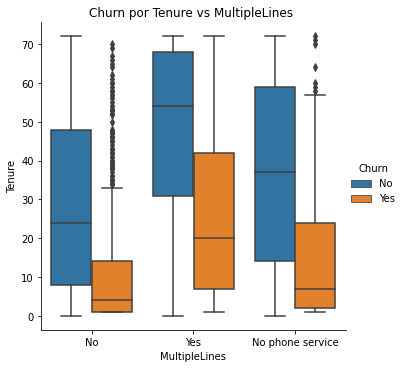

In [74]:
plot = sns.catplot(data=dados, kind='box', x='MultipleLines', y='Tenure', hue='Churn');
plot.set(title='Churn por Tenure vs MultipleLines ');

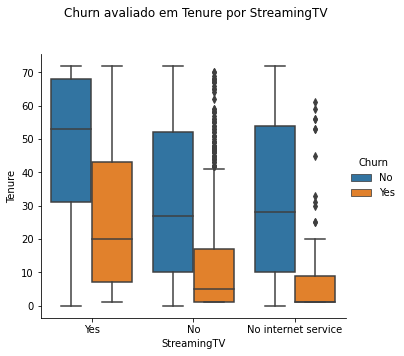

In [68]:
plot = sns.catplot(data=dados, kind='box', x='StreamingTV', y='Tenure', hue='Churn');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn avaliado em Tenure por StreamingTV');

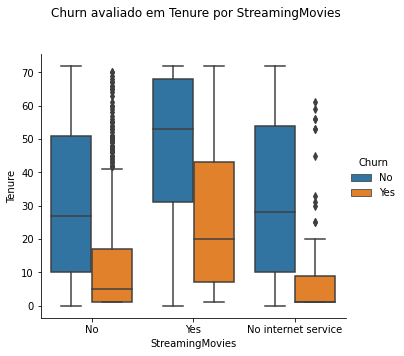

In [69]:
plot = sns.catplot(data=dados, kind='box', x='StreamingMovies', y='Tenure', hue='Churn');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn avaliado em Tenure por StreamingMovies');

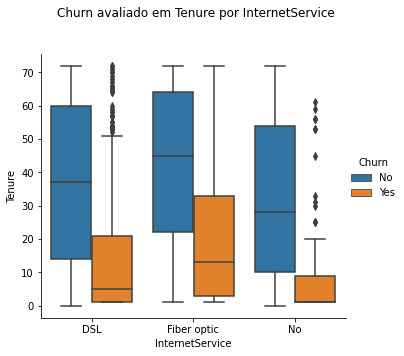

In [76]:
plot = sns.catplot(data=dados, kind='box', x='InternetService', y='Tenure', hue='Churn');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn avaliado em Tenure por InternetService');

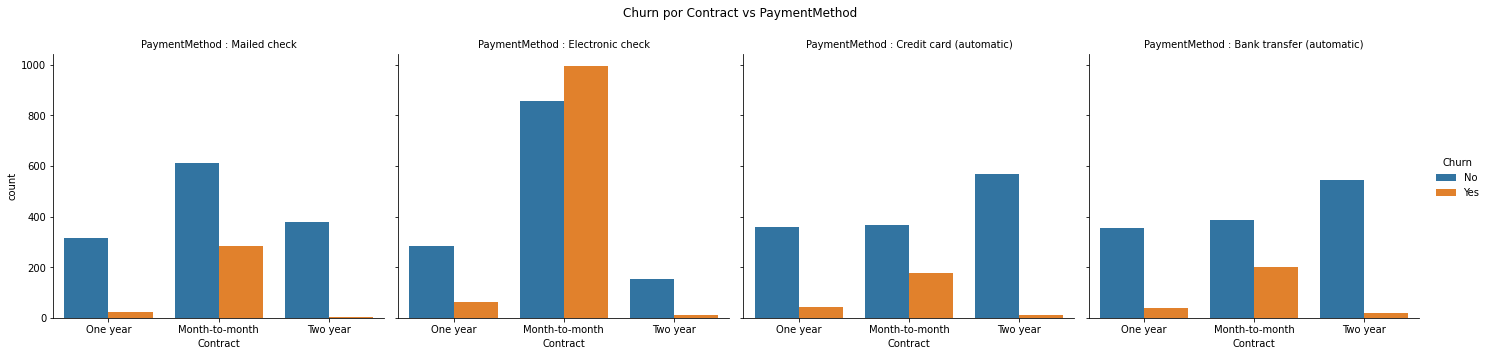

In [78]:
plot = sns.catplot(data=dados, kind='count', x='Contract', hue='Churn', col='PaymentMethod');
plot.set_titles('{col_var} : {col_name}');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn por Contract vs PaymentMethod');

Uma análise nos gráficos permite verifcar que:

- Não há distinção entre os sexos que demonstre uma diferença no cancelamento no plano.
- Quando a pessoa não é idosa, a taxa de cancelamento é maior do que as pessoas que são idosas.
- Os clientes sem companheiro(a) possuem cerca de duas vezes mais cancelamento de plano dos que possuem um(a) companheiro(a).
- Se o cliente não possui dependentes no plano, então é quatro vezes mais provável que este cliente cancelará o plano do que o cliente que possui dependentes.
- Clientes com serviço de telefone cancelam quase 10 vezes mais dos que não possuem serviço de telefonia.
- A taxa de cancelamento para cliente com múltiplas linhas telefônicas é praticamente igual para os que possuem somente uma linha telefônica.
- Clientes que possuem Internet por fibra ótica possuem mais que o dobro de cancelamentos do que os clientes que possuem os outros tipos de Internet.
- Em todos os casos onde os clientes não possuem contratação de Segurança Online, Backup Online, Proteção de Dispositivo e Suporte Técnico, a contabilização de cancelamentos de plano é sempre maior que o dobro do que os clientes que possuem tais contratações.
- A contratação de filmes por streaming não é um fator relevante para a taxa de cancelamento do cliente.
- A maior taxa de cancelamento ocorre quando o tipo de contrato do plano é mês a mês, em um contraste muito grande quando comparado aos contratos a cada 1 ou 2 anos.
- A maior taxa de cancelamento ocorre em clientes que recebem a fatura online.
- O pagamento por cheque eletrônico é o mais utilizado pelos clientes que realizam o cancelamento do plano.
- Clientes que possuem assinatura de TV a cabo, streaming de filmes, mais de uma linha telefônica e Internet por fibra ótica tendem a manter o contrato do plano por mais meses antes de fazerem o cancelamento.
- No caso onde o pagamento é feito por cheque eletrônico e o tipo de contrato é o mês a mês, a quantidade de cancelamentos supera a quantidade de permanência no plano.

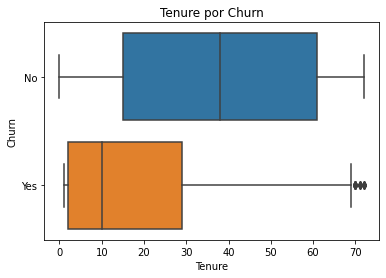

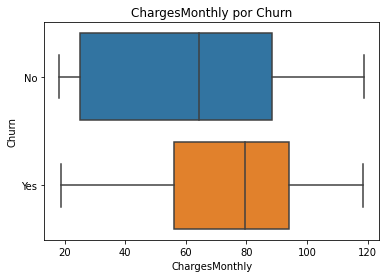

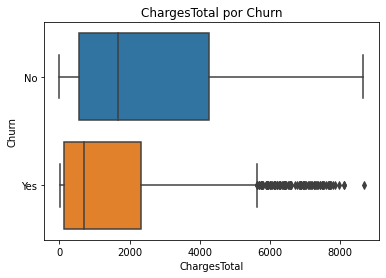

In [57]:
for col in ['Tenure', 'ChargesMonthly', 'ChargesTotal']:
    plt.figure()
    sns.boxplot(x=col, y='Churn', data=dados)
    plt.title("{} por Churn".format(col))
    plt.show()


Adicionalmente, os três gráficos acima mostram que os clientes que cancelam o plano são os que normalmente tem menos tempo de assinatura, gastam mais por mês mas ao mesmo tempo gastam menos no total (embora existam muitos _outliers_ de valor alto).

Para calcular a correlação do _Churn_ com as outras variáveis, primeiro cria-se uma cópia do _dataframe_ para realizar a transformação das variáveis para o tipo _category_.

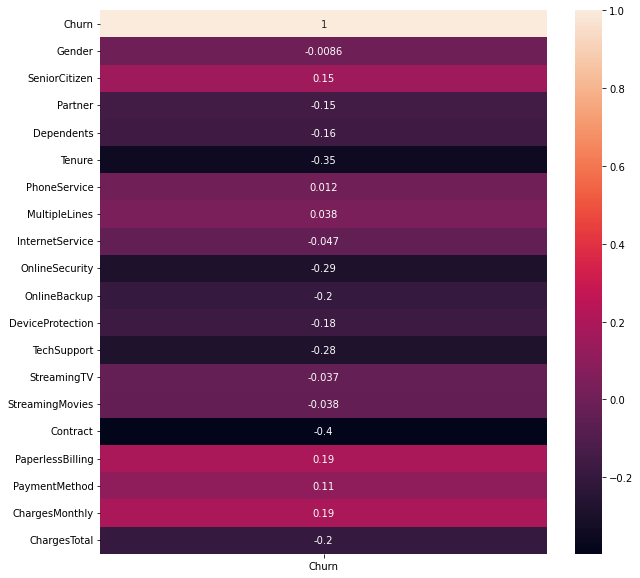

In [58]:
def label_encoding(categorical_col):
    encode = categorical_col.astype('category')
    return encode.cat.codes

dados_copy = dados.copy()
for col in dados_copy.select_dtypes(include=object).columns:
    dados_copy[col] = label_encoding(dados_copy[col])
correlation = dados_copy.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation[['Churn']], annot=True, ax=ax);

Por fim, percebe-se que os atributos que mais tem correlação com a variável de cancelamento são (em ordem decrescente): recebimento da fatura online, custo mensal, velhice e método de pagamento.

## Modelos de Aprendizagem de Máquina

Separação dos dados de entrada e de saída:

In [114]:
dados = pd.read_csv("dados_lt.csv")
x = dados.iloc[:, 1:]
y = dados.iloc[:,:1]

Realização da encodificação dos atributos categóricos:

In [151]:
enc = OrdinalEncoder(dtype='int')

y_enc = enc.fit_transform(y.to_numpy().reshape(-1,1))
y_df = pd.DataFrame(y_enc, columns=y.columns)

x_enc = enc.fit_transform(x.drop(['Tenure'], axis=1).iloc[:,:-2]) # retirei a coluna Tenure para caso haja valores não contínuos e a encodificação mapear os números erroneamente
x_df = pd.DataFrame(x_enc, columns=x.drop(['Tenure'], axis=1).iloc[:,:-2].columns)
x_df = pd.concat([x_df, x.iloc[:,-2:]], axis=1)
x_df.insert(4, 'Tenure', x['Tenure'])

Essa encodificação significa transformar os valores _strings_ das colunas em valores numéricos para que os modelos de Aprendizagem de Máquina possam trabalhar com os dados.

Verifica-se o balanceamento dos dados:

In [160]:
y_df.value_counts()

Churn
0        5174
1        1869
dtype: int64

Como pode-se ver, os dados não são balanceados, apenas um quarto dos dados tem a _label_ _Yes_, que no caso significa que houve cancelamento do plano. Dados não balanceados dificultam o aprendizado dos modelos pois estes tem menos dados de uma categoria do _target_ para aprender a modelar. Portanto, utilizarei três abordagens para fazer comparação de resultados, o _dataset_ padrão desbalanceado, o _dataset_ balanceado por _oversampling_ e o _dataset_ balanceado por _undersampling_. Para o _dataset oversampled_ foi utilizado a técnica SMOTE, já para o _dataset downsampled_ foi utilizado a técnica CondensedNearestNeighbour.

In [161]:
x_smote, y_smote = SMOTE().fit_resample(x_df, y_df)

In [177]:
y_smote.value_counts()

Churn
0        5174
1        5174
dtype: int64

In [182]:
x_cnn, y_cnn = CondensedNearestNeighbour(n_neighbors=1).fit_resample(x_df, y_df)

In [183]:
y_cnn.value_counts()

Churn
1        1869
0        1657
dtype: int64

Os dados dos três _datasets_ serão separados em 70% para treinamento e 30% para teste.

In [186]:
x_df_train, x_df_test, y_df_train, y_df_test = train_test_split(x_df, y_df, test_size=0.3)
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_smote, y_smote, test_size=0.3)
x_cnn_train, x_cnn_test, y_cnn_train, y_cnn_test = train_test_split(x_cnn, y_cnn, test_size=0.3)

Para testar os modelos, utiliza-se a versão padrão de todos, sem fazer qualquer refinamento para ver qual deles possui as melhores métricas em seus formatos base.

### _Dataset_ desbalanceado

Random Forest

In [201]:
rf = RandomForestClassifier()
rf.fit(x_df_train, y_df_train.to_numpy().ravel())
y_rf_pred = rf.predict(x_df_test)
print(classification_report(y_df_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1559
           1       0.65      0.47      0.55       554

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



In [202]:
roc_auc_score(y_df_test, y_rf_pred)

0.6898160905699525

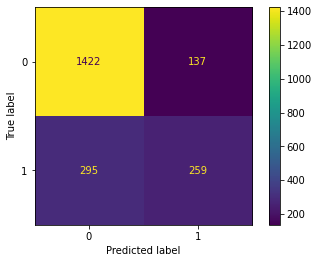

In [206]:
cm = confusion_matrix(y_df_test, y_rf_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

SVC

In [222]:
svc = SVC(kernel='linear')
svc.fit(x_df_train, y_df_train.to_numpy().ravel())
y_svc_pred = svc.predict(x_df_test)
print(classification_report(y_df_test, y_svc_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1559
           1       0.66      0.42      0.51       554

    accuracy                           0.79      2113
   macro avg       0.74      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113



In [223]:
roc_auc_score(y_df_test, y_svc_pred)

0.6709000724800448

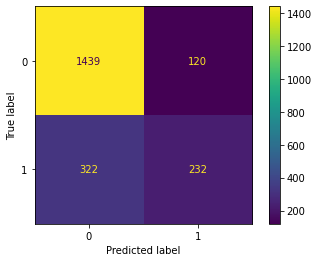

In [224]:
cm = confusion_matrix(y_df_test, y_svc_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

KNN

In [236]:
knn = KNeighborsClassifier()
knn.fit(x_df_train, y_df_train.to_numpy().ravel())
y_knn_pred = knn.predict(x_df_test)
print(classification_report(y_df_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1559
           1       0.55      0.43      0.48       554

    accuracy                           0.76      2113
   macro avg       0.68      0.65      0.66      2113
weighted avg       0.74      0.76      0.75      2113



In [237]:
roc_auc_score(y_df_test, y_knn_pred)

0.651679545575591

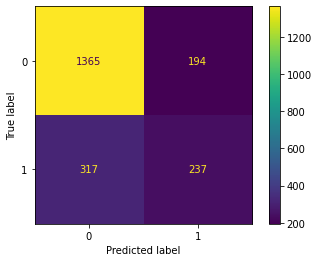

In [238]:
cm = confusion_matrix(y_df_test, y_knn_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

### _Dataset oversampled_ 

Random Forest

In [239]:
rf2 = RandomForestClassifier()
rf2.fit(x_smote_train, y_smote_train.to_numpy().ravel())
y_rf2_pred = rf2.predict(x_smote_test)
print(classification_report(y_smote_test, y_rf2_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1570
           1       0.84      0.86      0.85      1535

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



In [240]:
roc_auc_score(y_smote_test, y_rf2_pred)

0.8516089545426253

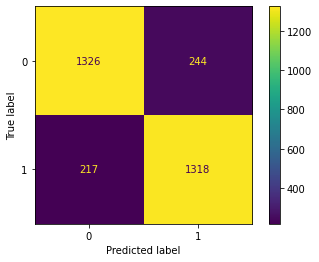

In [241]:
cm = confusion_matrix(y_smote_test, y_rf2_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

SVC

In [242]:
svc2 = SVC(kernel='linear')
svc2.fit(x_smote_train, y_smote_train.to_numpy().ravel())
y_svc2_pred = svc2.predict(x_smote_test)
print(classification_report(y_smote_test, y_svc2_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1570
           1       0.79      0.83      0.81      1535

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



In [243]:
roc_auc_score(y_smote_test, y_svc2_pred)

0.8070582377227744

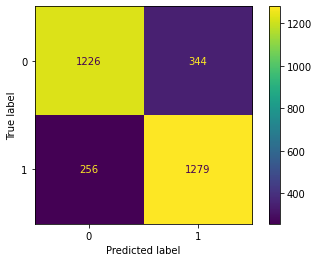

In [244]:
cm = confusion_matrix(y_smote_test, y_svc2_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

KNN

In [245]:
knn2 = KNeighborsClassifier()
knn2.fit(x_smote_train, y_smote_train.to_numpy().ravel())
y_knn2_pred = knn2.predict(x_smote_test)
print(classification_report(y_smote_test, y_knn2_pred))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1570
           1       0.73      0.84      0.78      1535

    accuracy                           0.76      3105
   macro avg       0.77      0.77      0.76      3105
weighted avg       0.77      0.76      0.76      3105



In [246]:
roc_auc_score(y_smote_test, y_knn2_pred)

0.7657513641361853

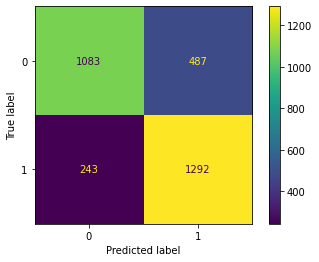

In [247]:
cm = confusion_matrix(y_smote_test, y_knn2_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

### _Dataset downsampled_

Ramdom Forest

In [248]:
rf3 = RandomForestClassifier()
rf3.fit(x_cnn_train, y_cnn_train.to_numpy().ravel())
y_rf3_pred = rf3.predict(x_cnn_test)
print(classification_report(y_cnn_test, y_rf3_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       517
           1       0.66      0.68      0.67       541

    accuracy                           0.65      1058
   macro avg       0.65      0.65      0.65      1058
weighted avg       0.65      0.65      0.65      1058



In [249]:
roc_auc_score(y_cnn_test, y_rf3_pred)

0.6534571339699746

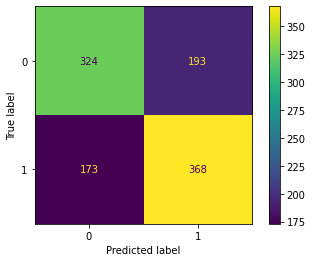

In [250]:
cm = confusion_matrix(y_cnn_test, y_rf3_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

SVC

In [251]:
svc3 = SVC(kernel='linear')
svc3.fit(x_cnn_train, y_cnn_train.to_numpy().ravel())
y_svc3_pred = svc3.predict(x_cnn_test)
print(classification_report(y_cnn_test, y_svc3_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       517
           1       0.66      0.74      0.70       541

    accuracy                           0.67      1058
   macro avg       0.67      0.67      0.67      1058
weighted avg       0.67      0.67      0.67      1058



In [253]:
roc_auc_score(y_cnn_test, y_svc3_pred)

0.671426579477077

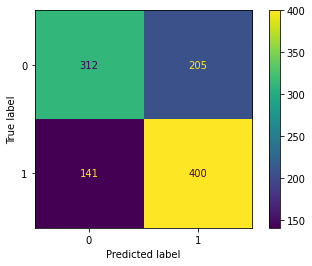

In [254]:
cm = confusion_matrix(y_cnn_test, y_svc3_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

KNN

In [255]:
knn3 = KNeighborsClassifier()
knn3.fit(x_cnn_train, y_cnn_train.to_numpy().ravel())
y_knn3_pred = knn3.predict(x_cnn_test)
print(classification_report(y_cnn_test, y_knn3_pred))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54       517
           1       0.57      0.59      0.58       541

    accuracy                           0.56      1058
   macro avg       0.56      0.56      0.56      1058
weighted avg       0.56      0.56      0.56      1058



In [256]:
roc_auc_score(y_cnn_test, y_knn3_pred)

0.5635973928930235

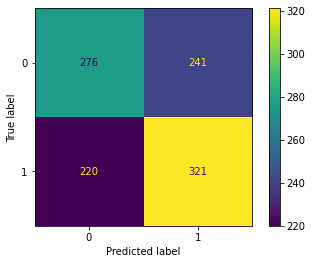

In [257]:
cm = confusion_matrix(y_cnn_test, y_knn3_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

### Conclusão

Fazendo-se uma análise nas métricas de todos os modelos, pode-se ver que surpreendentemente os modelos que foram treinados com o _dataset downsampled_ obtiveram resultados piores do que os modelos que foram treinados com o _dataset_ desbalanceado e com o _dataset oversampled_, sendo o modelo _Random Forest_ com o _dataset oversampled_ que apresentou os melhores valores das métricas (as métricas de _recall_, precisão, acurácia, F1-Score e ROC AUC tiveram todos seus valores por volta de 0.85). Portanto, um próximo passo, seria um aprimoramento desse modelo, através de refinamento das suas variáveis, como também um _Feature Selection_, para usar somente atributos que realmente têm importância para o aprendizado do modelo.